# Monetarist Theory of Price Levels with Adaptive Expectations

## Overview

我们将使用线性代数来进行一些实验，探讨一种替代的“货币主义”或“财政”价格水平理论。

与货币主义价格水平理论中的模型类似，该模型断言，当政府持续支出超过税收收入并通过印钞来弥补赤字时，它会对价格水平产生上行压力并引发持续的通货膨胀。

与“完美预见”或“理性预期”版本的模型不同，我们本次讲座中的模型是[[Cagan, 1956](https://intro.quantecon.org/zreferences.html#id110)]用来研究高通胀货币动态的模型的“适应性预期”版本。

它结合了以下组成部分：

- 一个对实际货币余额的需求函数，该函数断言实际余额需求量的对数与公众预期的通货膨胀率成反比
- 一个**适应性预期**模型，描述了公众预期的通货膨胀率如何响应过去实际通货膨胀的值
- 一个平衡条件，将货币需求与供应相等同
- 一个外生的货币供应增长率序列

我们的模型非常接近Cagan最初的规范。

我们将使用的唯一的线性代数运算是矩阵乘法和矩阵求逆。

为了便于使用线性矩阵代数作为我们主要的数学工具，我们将使用模型的有限期版本。

## Structure of the model


设

- $ m_t $ 为名义货币余额的对数；
- $ \mu_t = m_{t+1} - m_t $ 为名义余额的净增长率；
- $ p_t $ 为价格水平的对数；
- $ \pi_t = p_{t+1} - p_t $ 为 $ t $ 和 $ t+1 $ 之间的净通胀率；
- $ \pi_t^* $ 为公众预期的 $ t $ 和 $ t+1 $ 之间的通胀率；
- $ T $ 为 **Horizon**——即模型确定 $ p_t $ 的最后一个时期；
- $ \pi_0^* $ 为公众对时间 $ 0 $ 和时间 $ 1 $ 之间通胀率的初始预期。

实际余额需求 $ \exp\left(m_t^d-p_t\right) $ 由以下版本的 Cagan 需求函数控制


<a id='equation-eq-caganmd-ad'></a>
$$
m_t^d - p_t = -\alpha \pi_t^* \: , \: \alpha > 0 ; \quad t = 0, 1, \ldots, T . \tag{15.1}
$$

此方程断言实际余额需求与公众预期的通胀率成反比。

将方程 [(15.1)](#equation-eq-caganmd-ad) 中的货币需求对数 $ m_t^d $ 等同于货币供应对数 $ m_t $ 并求解价格水平对数 $ p_t $ 得到


<a id='equation-eq-eqfiscth1'></a>
$$
p_t = m_t + \alpha \pi_t^* \tag{15.2}
$$

将时间 $ t+1 $ 和时间 $ t $ 的方程 [(15.2)](#equation-eq-eqfiscth1) 相减得到


<a id='equation-eq-eqpipi'></a>
$$
\pi_t = \mu_t + \alpha \pi_{t+1}^* - \alpha \pi_t^* \tag{15.3}
$$

我们假设预期的通胀率 $ \pi_t^* $ 由以下**适应性预期方案**控制，该方案由 [[Friedman, 1956](https://intro.quantecon.org/zreferences.html#id181)] 和 [[Cagan, 1956](https://intro.quantecon.org/zreferences.html#id110)] 提出：


<a id='equation-eq-adaptexpn'></a>
$$
\pi_{t+1}^* = \lambda \pi_t^* + (1 -\lambda) \pi_t \tag{15.4}
$$

作为模型的外生输入，我们取初始条件 $ m_0, \pi_0^* $ 和货币增长率序列 $ \mu = \{\mu_t\}_{t=0}^T $。

作为我们模型的内生输出，我们希望找到序列 $ \pi = \{\pi_t\}_{t=0}^T, p = \{p_t\}_{t=0}^T $ 作为外生输入的函数。

我们将通过研究模型输出如何随着模型输入的变化而变化来进行一些思维实验。

## Representing key equations with linear algebra

我们首先将方程 [(15.4)](#equation-eq-adaptexpn) 的适应性预期模型 $ \pi_t^* $ 为 $ t=0, \ldots, T $ 写成

$$
\begin{bmatrix} 1 & 0 & 0 & \cdots & 0 & 0 \cr
-\lambda & 1 & 0 & \cdots & 0 & 0 \cr
0 & - \lambda  & 1  & \cdots & 0 & 0 \cr
\vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
0 & 0 & 0 & \cdots & -\lambda & 1
\end{bmatrix}
\begin{bmatrix} \pi_0^* \cr
  \pi_1^* \cr
  \pi_2^* \cr
  \vdots \cr
  \pi_{T+1}^* 
  \end{bmatrix} =
  (1-\lambda) \begin{bmatrix} 
  0 & 0 & 0 & \cdots & 0  \cr
  1 & 0 & 0 & \cdots & 0   \cr
   0 & 1 & 0 & \cdots & 0  \cr
    \vdots &\vdots & \vdots & \cdots & \vdots  \cr
     0 & 0 & 0 & \cdots & 1  \end{bmatrix}
     \begin{bmatrix}\pi_0 \cr \pi_1 \cr \pi_2 \cr \vdots \cr \pi_T
  \end{bmatrix} +
  \begin{bmatrix} \pi_0^* \cr 0 \cr 0 \cr \vdots \cr 0 \end{bmatrix}
$$

将此方程写成


<a id='equation-eq-eq1'></a>
$$
A \pi^* = (1-\lambda) B \pi + \pi_0^* \tag{15.5}
$$

其中 $ (T+2) \times (T+2) $ 矩阵 $ A $，$ (T+2)\times (T+1) $ 矩阵 $ B $，以及向量 $ \pi^* , \pi_0, \pi_0^* $ 通过使这两个方程对齐来隐式定义。

接下来我们将关键方程 [(15.3)](#equation-eq-eqpipi) 用矩阵表示法写成

$$
\begin{bmatrix}
\pi_0 \cr \pi_1 \cr \pi_1 \cr \vdots \cr \pi_T \end{bmatrix}
= \begin{bmatrix}
\mu_0 \cr \mu_1 \cr \mu_2 \cr  \vdots \cr \mu_T \end{bmatrix}
+ \begin{bmatrix} - \alpha &  \alpha & 0 & \cdots & 0 & 0 \cr
0 & -\alpha & \alpha & \cdots & 0 & 0 \cr
0 & 0 & -\alpha & \cdots & 0 & 0 \cr
\vdots & \vdots & \vdots & \cdots & \alpha & 0 \cr
0 & 0 & 0 & \cdots & -\alpha  & \alpha 
\end{bmatrix}
\begin{bmatrix} \pi_0^* \cr
  \pi_1^* \cr
  \pi_2^* \cr
  \vdots \cr
  \pi_{T+1}^* 
  \end{bmatrix}
$$

将前面的方程系统用向量和矩阵表示为


<a id='equation-eq-eq2'></a>
$$
\pi = \mu + C \pi^* \tag{15.6}
$$

其中 $ (T+1) \times (T+2) $ 矩阵 $ C $ 被隐式定义，以使这个方程与前面的方程系统对齐。

## Harvesting insights from our matrix formulation

我们现在拥有所有需要的成分，可以解出 $ \pi $ 作为 $ \mu, \pi_0, \pi_0^* $ 的函数。

将方程 [(15.5)](#equation-eq-eq1) 和 [(15.6)](#equation-eq-eq2) 结合起来得到

$$
\begin{aligned}
A \pi^* & = (1-\lambda) B \pi + \pi_0^* \cr
 & = (1-\lambda) B \left[ \mu + C \pi^* \right] + \pi_0^*
\end{aligned}
$$

这意味着

$$
\left[ A - (1-\lambda) B C \right] \pi^* = (1-\lambda) B \mu+ \pi_0^*
$$

将上述方程左侧的矩阵求逆，再乘以两边，得到

<a id='equation-eq-eq4'></a>
$$
\pi^* = \left[ A - (1-\lambda) B C \right]^{-1} \left[ (1-\lambda) B \mu+ \pi_0^* \right] \tag{15.7}
$$

解出方程 [(15.7)](#equation-eq-eq4) 中的 $ \pi^* $ 后，我们可以使用方程 [(15.6)](#equation-eq-eq2) 解出 $ \pi $：

$$
\pi = \mu + C \pi^*
$$

因此，我们已经解出了我们模型决定的两个关键的内生时间序列，即预期通胀率序列 $ \pi^* $ 和实际通胀率序列 $ \pi $。

知道了这些，我们就可以快速地从方程 [(15.2)](#equation-eq-eqfiscth1) 计算出相关的价格水平对数序列 $ p $。

让我们详细说明这一步。

由于我们现在知道了 $ \mu $，计算 $ m $ 就很容易了。

因此，注意我们可以将方程

$$
m_{t+1} = m_t + \mu_t , \quad t = 0, 1, \ldots, T
$$

表示为矩阵方程

<a id='equation-eq-eq101-ad'></a>

$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 \cr
-1 & 1 & 0 & \cdots & 0 & 0 \cr
0  & -1 & 1 & \cdots & 0 & 0 \cr
\vdots  & \vdots & \vdots & \vdots & 0 & 0 \cr
0  & 0 & 0 & \cdots & 1 & 0 \cr
0  & 0 & 0 & \cdots & -1 & 1 
\end{bmatrix} \begin{bmatrix}  
m_1 \cr m_2 \cr m_3 \cr \vdots \cr m_T \cr m_{T+1}
\end{bmatrix} = \begin{bmatrix}  
\mu_0 \cr \mu_1 \cr \mu_2 \cr \vdots \cr \mu_{T-1} \cr \mu_T
\end{bmatrix} + \begin{bmatrix}  
m_0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr 0
\end{bmatrix} \tag{15.8}
$$

将方程 [(15.8)](#equation-eq-eq101-ad) 两边与左侧矩阵的逆矩阵相乘，将得到

<a id='equation-eq-mcum-ad'></a>
$$
m_t = m_0 + \sum_{s=0}^{t-1} \mu_s, \quad t =1, \ldots, T+1 \tag{15.9}
$$

方程 [(15.9)](#equation-eq-mcum-ad) 显示了在时间 $ t $ 的货币供应量对数等于初始货币供应量 $ m_0 $ 的对数加上从时间 $ 0 $ 到 $ t $ 之间的货币增长率累积。

然后我们可以从方程 [(15.2)](#equation-eq-eqfiscth1) 计算出每个 $ t $ 的 $ p_t $。

我们可以为 $ p $ 写出一个紧凑的公式

$$
p = m + \alpha \hat \pi^*
$$

其中

$$
\hat \pi^* = \begin{bmatrix} \pi_0^* \cr
  \pi_1^* \cr
  \pi_2^* \cr
  \vdots \cr
  \pi_{T}^* 
  \end{bmatrix},
$$

这只是去掉最后一个元素的 $ \pi^* $。


## Forecast errors and model computation

我们的计算将验证

$$
\hat \pi^* \neq  \pi,
$$

因此一般而言

<a id='equation-eq-notre'></a>
$$
\pi_t^* \neq \pi_t, \quad t = 0, 1, \ldots , T \tag{15.10}
$$

当像方程 [(15.4)](#equation-eq-adaptexpn) 这样的适应性预期假设作为模型的一个组成部分时，这种结果是典型的。



像往常一样，我们将从导入一些 Python 模块开始。


In [1]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

In [2]:
Cagan_Adaptive = namedtuple("Cagan_Adaptive", 
                        ["α", "m0", "Eπ0", "T", "λ"])

def create_cagan_adaptive_model(α = 5, m0 = 1, Eπ0 = 0.5, T=80, λ = 0.9):
    return Cagan_Adaptive(α, m0, Eπ0, T, λ)

md = create_cagan_adaptive_model()

我们使用以下函数求解模型并绘制相关变量。

In [3]:
def solve_cagan_adaptive(model, μ_seq):
    " Solve the Cagan model in finite time. "
    α, m0, Eπ0, T, λ = model
    
    A = np.eye(T+2, T+2) - λ*np.eye(T+2, T+2, k=-1)
    B = np.eye(T+2, T+1, k=-1)
    C = -α*np.eye(T+1, T+2) + α*np.eye(T+1, T+2, k=1)
    Eπ0_seq = np.append(Eπ0, np.zeros(T+1))

    # Eπ_seq is of length T+2
    Eπ_seq = np.linalg.solve(A - (1-λ)*B @ C, (1-λ) * B @ μ_seq + Eπ0_seq)

    # π_seq is of length T+1
    π_seq = μ_seq + C @ Eπ_seq

    D = np.eye(T+1, T+1) - np.eye(T+1, T+1, k=-1) # D is the coefficient matrix in Equation (14.8)
    m0_seq = np.append(m0, np.zeros(T))

    # m_seq is of length T+2
    m_seq = np.linalg.solve(D, μ_seq + m0_seq)
    m_seq = np.append(m0, m_seq)

    # p_seq is of length T+2
    p_seq = m_seq + α * Eπ_seq

    return π_seq, Eπ_seq, m_seq, p_seq

In [4]:
def solve_and_plot(model, μ_seq):
    
    π_seq, Eπ_seq, m_seq, p_seq = solve_cagan_adaptive(model, μ_seq)
    
    T_seq = range(model.T+2)
    
    fig, ax = plt.subplots(5, 1, figsize=[5, 12], dpi=200)
    ax[0].plot(T_seq[:-1], μ_seq)
    ax[1].plot(T_seq[:-1], π_seq, label=r'$\pi_t$')
    ax[1].plot(T_seq, Eπ_seq, label=r'$\pi^{*}_{t}$')
    ax[2].plot(T_seq, m_seq - p_seq)
    ax[3].plot(T_seq, m_seq)
    ax[4].plot(T_seq, p_seq)
    
    y_labs = [r'$\mu$', r'$\pi$', r'$m - p$', r'$m$', r'$p$']
    subplot_title = [r'Money supply growth', r'Inflation', r'Real balances', r'Money supply', r'Price level']

    for i in range(5):
        ax[i].set_xlabel(r'$t$')
        ax[i].set_ylabel(y_labs[i])
        ax[i].set_title(subplot_title[i])

    ax[1].legend()
    plt.tight_layout()
    plt.show()
    
    return π_seq, Eπ_seq, m_seq, p_seq

## Technical condition for stability

在构建我们的例子时，我们将假设 $ (\lambda, \alpha) $ 满足以下条件


<a id='equation-eq-suffcond'></a>
$$
\Bigl| \frac{\lambda-\alpha(1-\lambda)}{1-\alpha(1-\lambda)} \Bigr| < 1 \tag{15.11}
$$

这个条件的来源是以下一系列推导：

$$
\begin{aligned}
\pi_{t}&=\mu_{t}+\alpha\pi_{t+1}^{*}-\alpha\pi_{t}^{*}\\\pi_{t+1}^{*}&=\lambda\pi_{t}^{*}+(1-\lambda)\pi_{t}\\\pi_{t}&=\frac{\mu_{t}}{1-\alpha(1-\lambda)}-\frac{\alpha(1-\lambda)}{1-\alpha(1-\lambda)}\pi_{t}^{*}\\\implies\pi_{t}^{*}&=\frac{1}{\alpha(1-\lambda)}\mu_{t}-\frac{1-\alpha(1-\lambda)}{\alpha(1-\lambda)}\pi_{t}\\\pi_{t+1}&=\frac{\mu_{t+1}}{1-\alpha(1-\lambda)}-\frac{\alpha(1-\lambda)}{1-\alpha(1-\lambda)}\left(\lambda\pi_{t}^{*}+(1-\lambda)\pi_{t}\right)\\&=\frac{\mu_{t+1}}{1-\alpha(1-\lambda)}-\frac{\lambda}{1-\alpha(1-\lambda)}\mu_{t}+\frac{\lambda-\alpha(1-\lambda)}{1-\alpha(1-\lambda)}\pi_{t}
\end{aligned}
$$

通过确保 $ \pi_t $ 的系数在绝对值上小于1，条件 [(15.11)](#equation-eq-suffcond) 确保了我们推导串的最后一行所描述的 $ \{\pi_t\} $ 的动态稳定性。

读者可以自由地研究违反条件 [(15.11)](#equation-eq-suffcond) 的例子中的结果。

In [5]:
print(np.abs((md.λ - md.α*(1-md.λ))/(1 - md.α*(1-md.λ))))

0.8


## Experiments

现在我们来做一些实验。

### 实验 1

我们将研究一种情况，即货币供应量的增长率从 $ t=0 $ 到 $ t= T_1 $ 是 $ \mu_0 $，然后在 $ t=T_1 $ 时永久性地下降到 $ \mu^* $。

因此，设 $ T_1 \in (0, T) $。

所以当 $ \mu_0 > \mu^* $ 时，我们假设

$$
\mu_{t} = \begin{cases}
    \mu_0  , & t = 0, \ldots, T_1 -1 \\
     \mu^* , & t \geq T_1
     \end{cases}
$$

注意，我们在理性预期版本的模型中，已经研究了完全相同的实验。

因此，通过比较两个模型的结果，我们可以了解到假设适应性预期（正如我们在这里所做的）与假设理性预期（正如我们在另一次讲座中所做的）的不同后果。

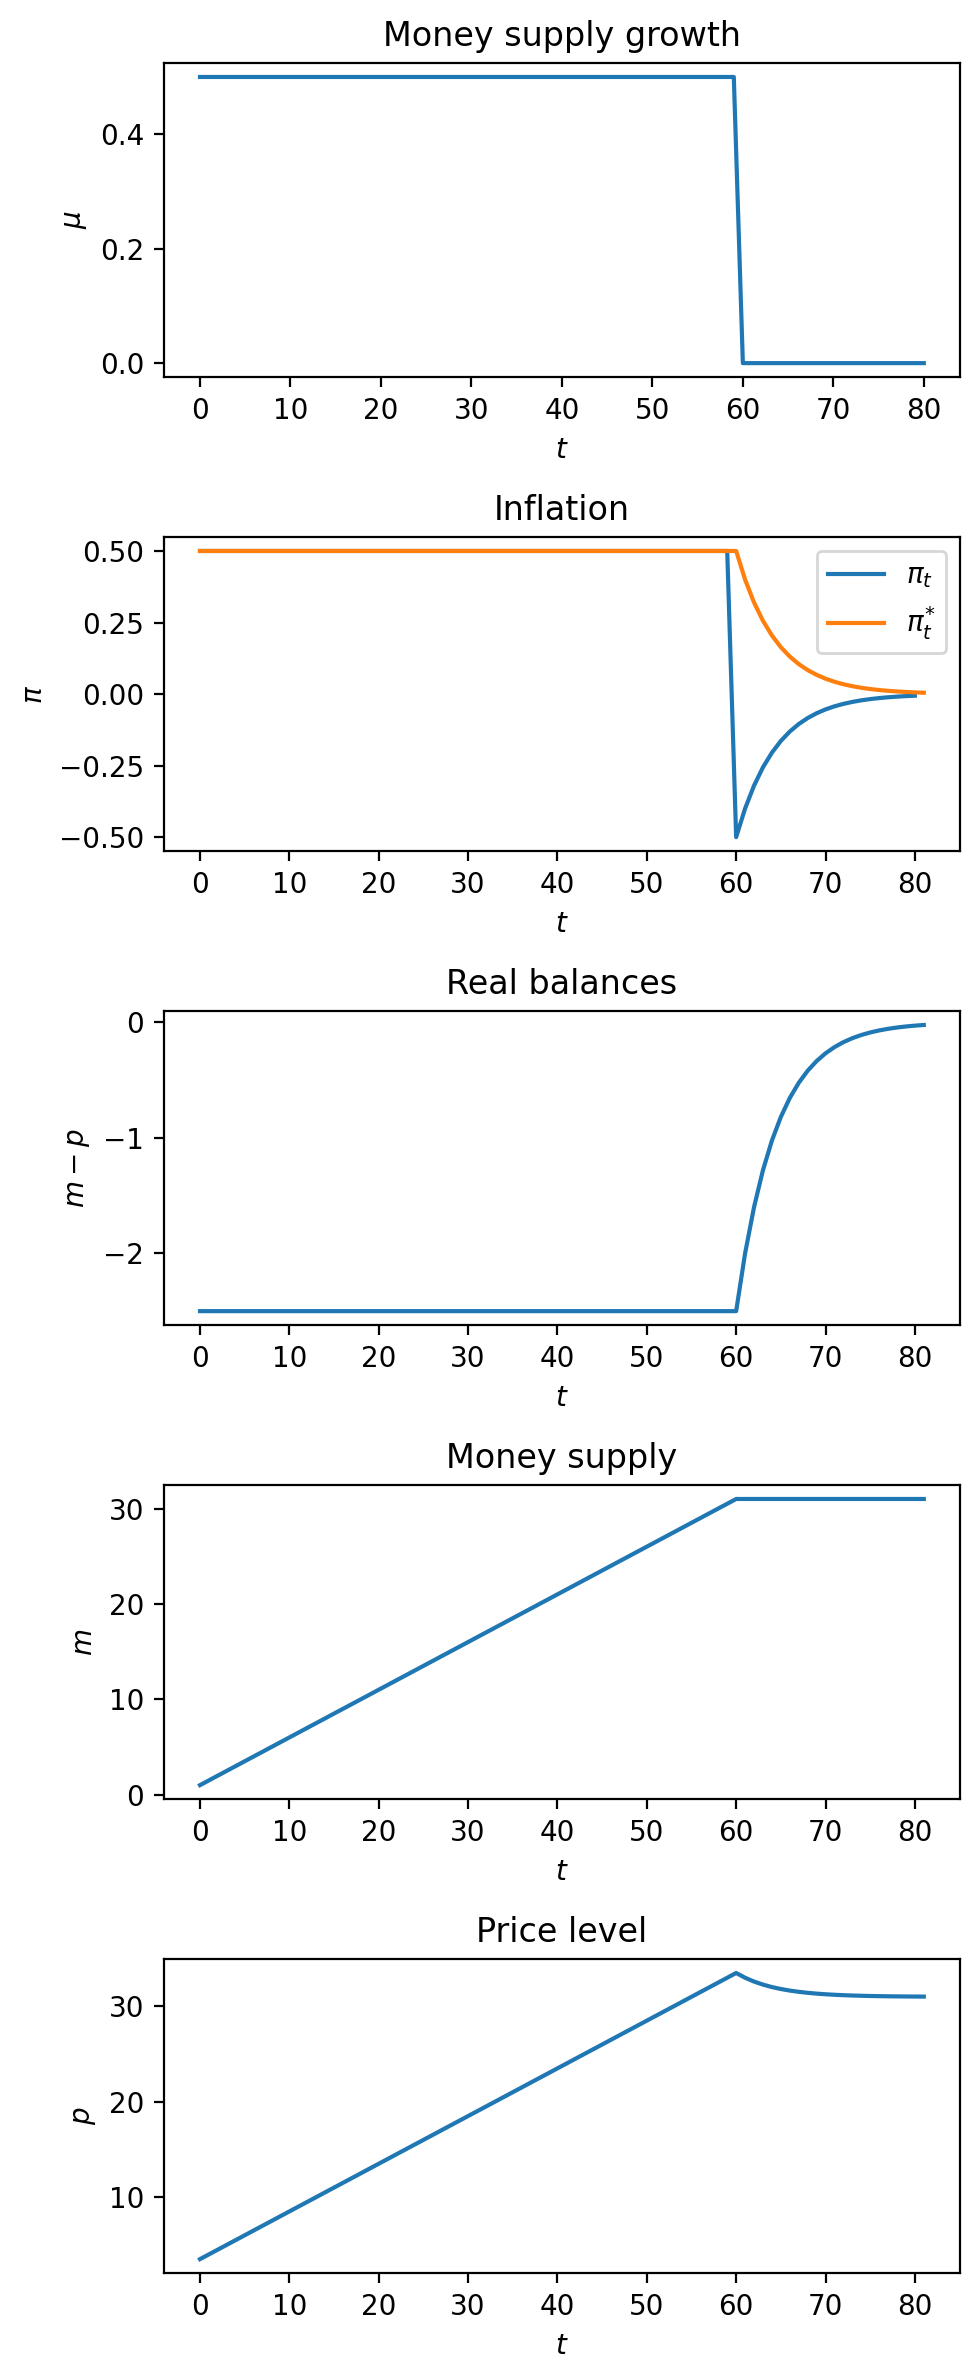

In [6]:
# Parameters for the experiment 1
T1 = 60
μ0 = 0.5
μ_star = 0

μ_seq_1 = np.append(μ0*np.ones(T1), μ_star*np.ones(md.T+1-T1))

# solve and plot
π_seq_1, Eπ_seq_1, m_seq_1, p_seq_1 = solve_and_plot(md, μ_seq_1)



请注意实际通胀率 $ \pi_t $ 在货币供应增长率在时间 $ T_1 $ 突然下降时“**超调(overshoot)**”其最终稳态值。

这种超调的来源是什么？为什么它不会在模型的理性预期版本中发生？

### 实验 2

现在我们将进行一个不同的实验，即**渐进稳定化**，其中货币供应增长率从高值平稳下降到持续的低值。

虽然价格水平通胀最终会下降，但其下降速度比最终导致其下降的驱动力，即货币供应增长率的下降，要慢。

通胀缓慢下降的解释是，在从高通胀到低通胀的过渡期间，预期通胀 $ \pi_t^* $ 持续超过实际通胀 $ \pi_t $。

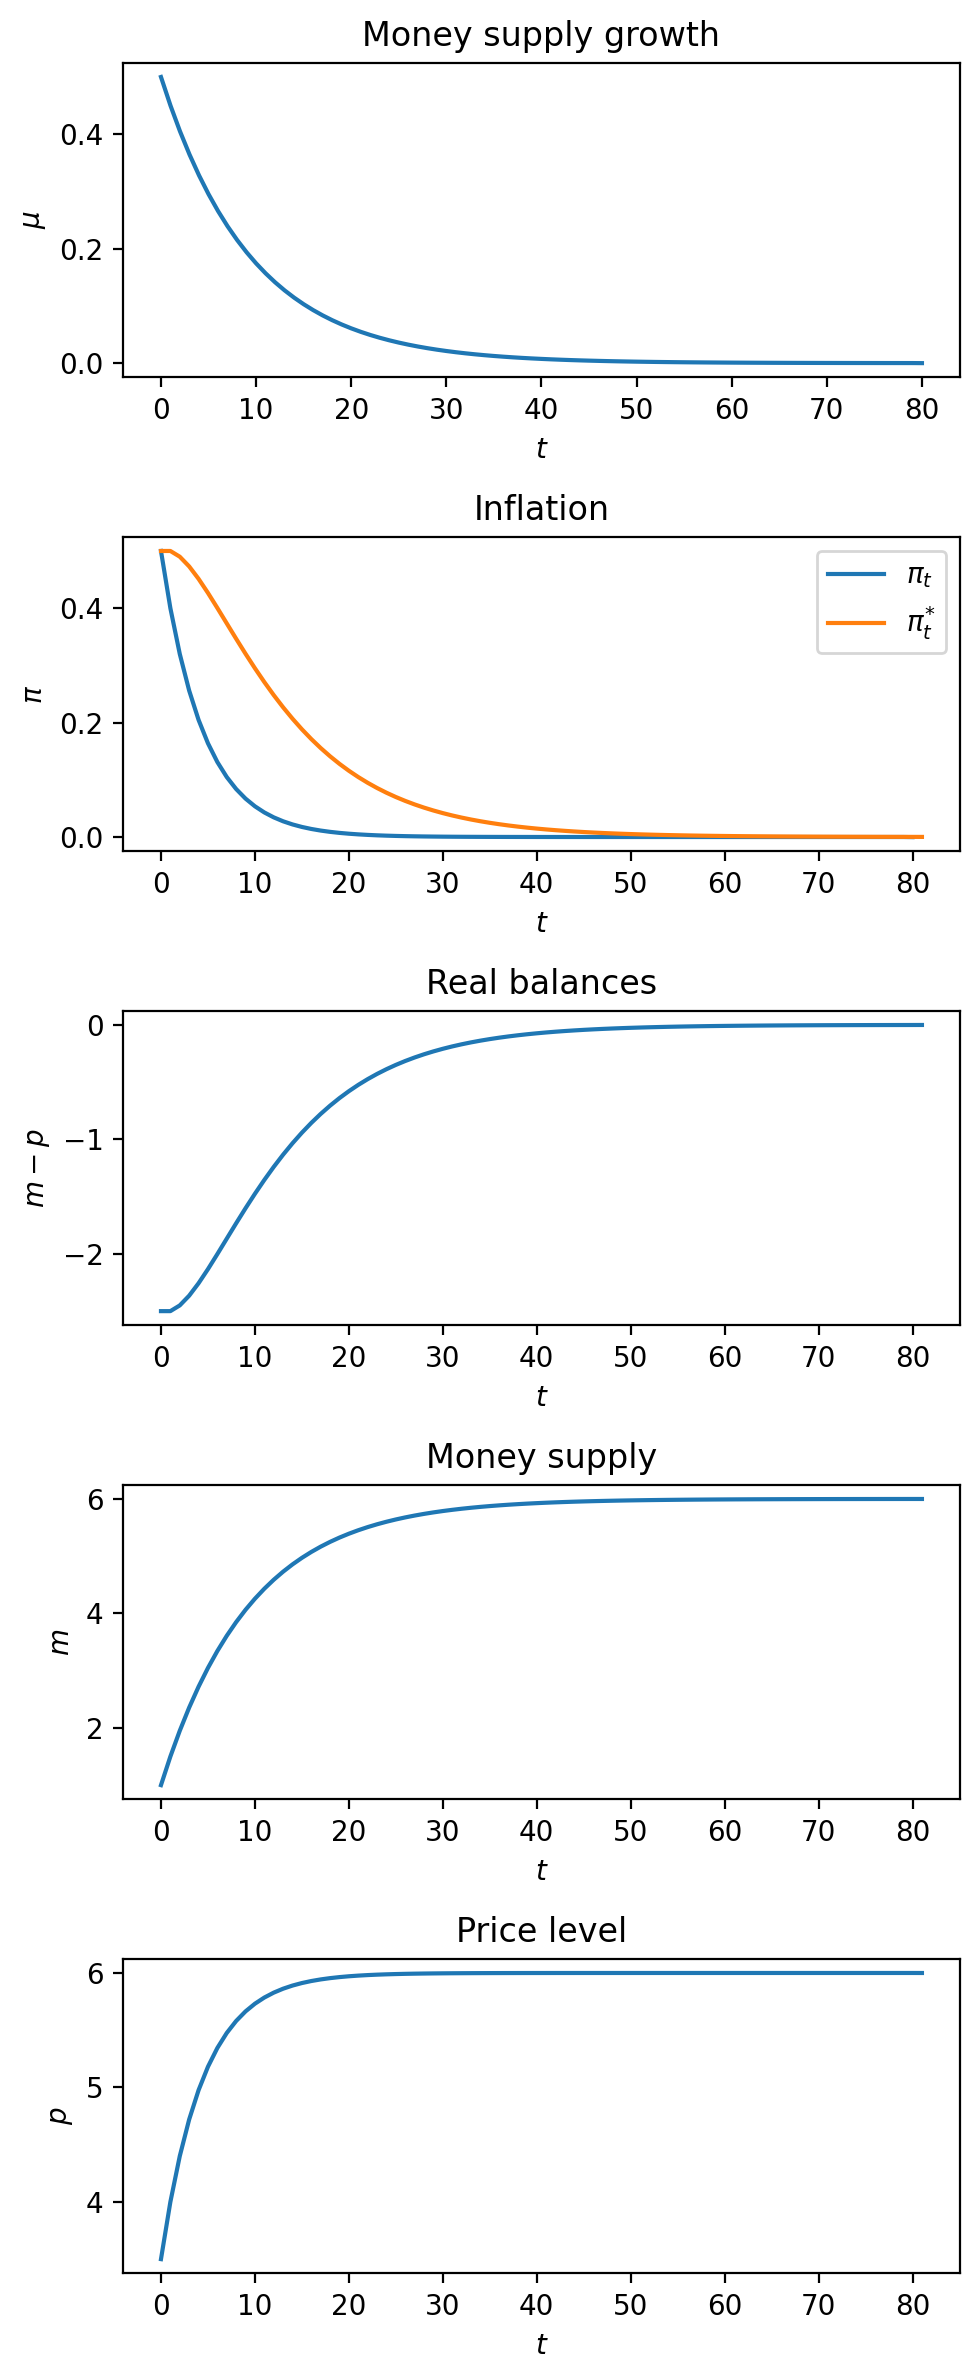

In [7]:
# parameters
ϕ = 0.9
μ_seq_2 = np.array([ϕ**t * μ0 + (1-ϕ**t)*μ_star for t in range(md.T)])
μ_seq_2 = np.append(μ_seq_2, μ_star)


# solve and plot
π_seq_2, Eπ_seq_2, m_seq_2, p_seq_2 = solve_and_plot(md, μ_seq_2)